In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/rajesh/Downloads')

train=pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.shape

(614, 13)

In [6]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

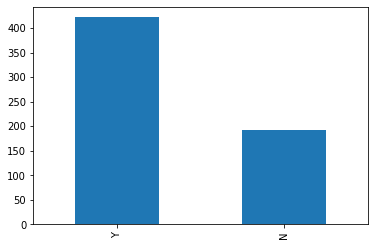

In [7]:
train['Loan_Status'].value_counts().plot.bar()

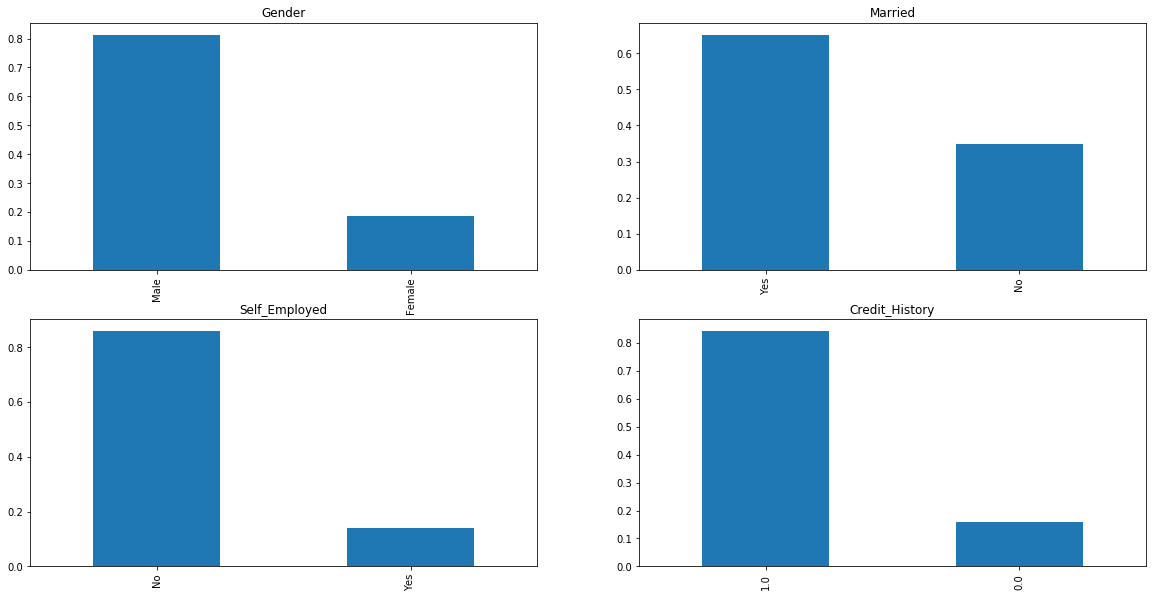

In [8]:
plt.figure(1)   
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)  
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()

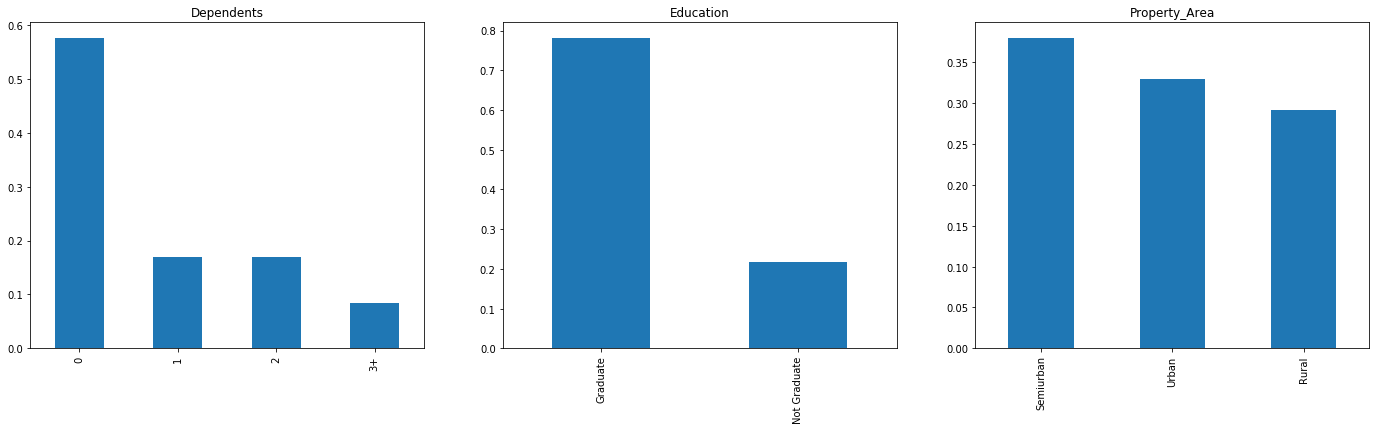

In [9]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

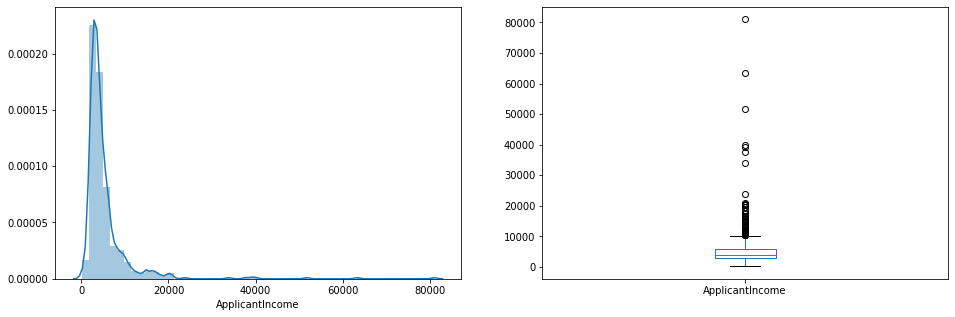

In [10]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

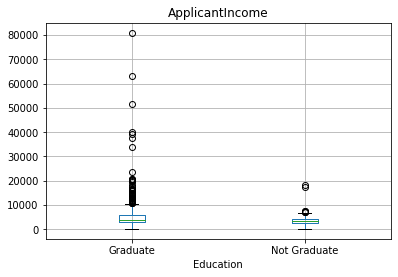

In [11]:
train.boxplot(column='ApplicantIncome', by='Education') 
plt.suptitle("")

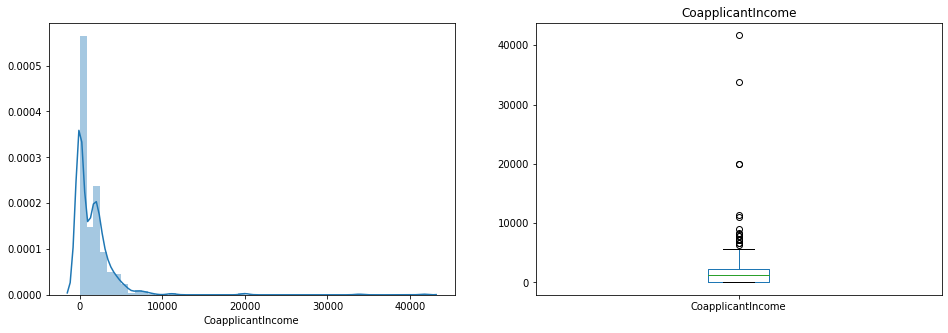

In [12]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(1,2,2)
train['CoapplicantIncome'].plot.box(figsize=(16,5),title='CoapplicantIncome')
plt.show()

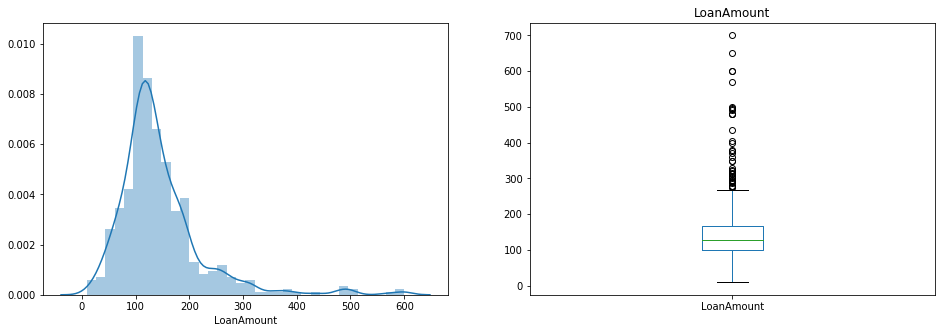

In [13]:
plt.figure(2)
plt.subplot(1,2,1)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(1,2,2)
train['LoanAmount'].plot.box(figsize=(16,5), title='LoanAmount')
plt.show()

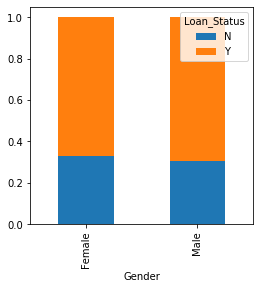

In [14]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender=Gender.div(Gender.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4))

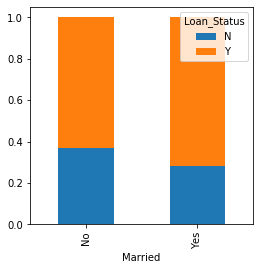

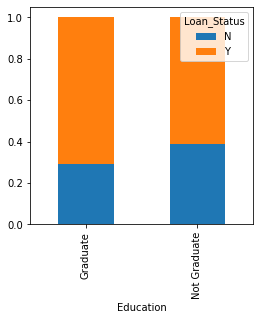

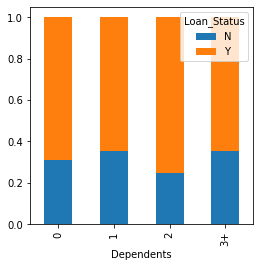

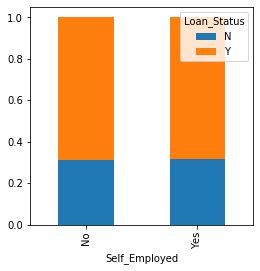

In [17]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married=Married.div(Married.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(4,4)) 
plt.show()

Education=Education.div(Education.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(4,4)) 
plt.show()

Dependents=Dependents.div(Dependents.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(4,4)) 
plt.show()

Self_Employed=Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(4,4)) 
plt.show()

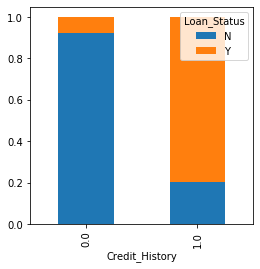

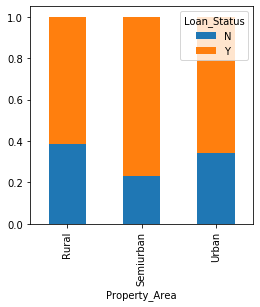

In [18]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1), axis=0).plot.bar(stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1), axis=0).plot.bar(stacked=True, figsize=(4,4))

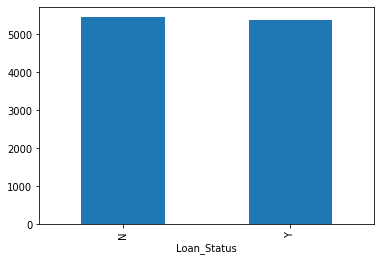

In [19]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

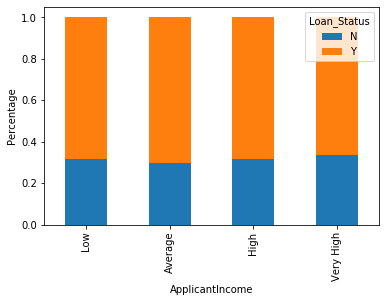

In [20]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average', 'High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

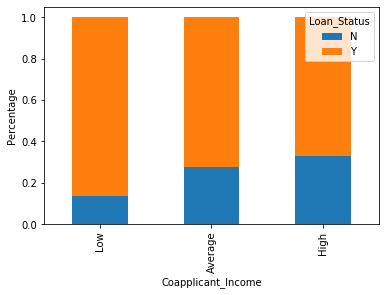

In [22]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_Bin=pd.crosstab(train['Coapplicant_Income_Bin'],train['Loan_Status'])
Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)
plt.xlabel('Coapplicant_Income')
plt.ylabel('Percentage')

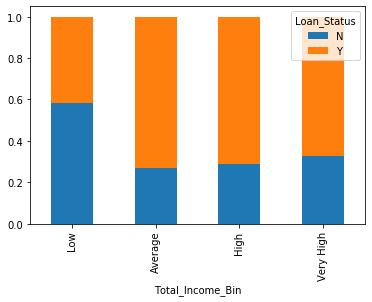

In [23]:
train['Total_Income']=train["ApplicantIncome"]+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_Bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_Bin=pd.crosstab(train['Total_Income_Bin'],train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

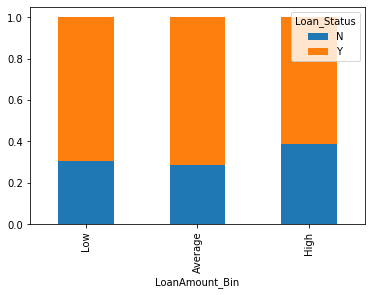

In [24]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_Bin=pd.crosstab(train['LoanAmount_Bin'],train['Loan_Status'])
LoanAmount_Bin.div(LoanAmount_Bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

In [25]:
train=train.drop(['Income_bin','Coapplicant_Income_Bin','LoanAmount_Bin','Total_Income_Bin','Total_Income'], axis=1)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

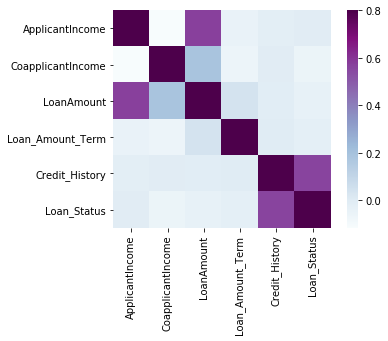

In [27]:
matrix=train.corr()
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu')

In [28]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

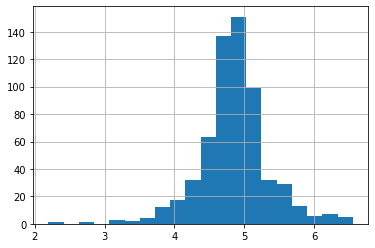

In [34]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [35]:
train=train.drop('Loan_ID',axis=1)
test_original=test
test=test.drop('Loan_ID', axis=1)

In [36]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

In [37]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [41]:
pred_test=model.predict(test)
submission=pd.read_csv("Sample_Submission.csv")

In [42]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [43]:
submission['Loan_Status'].replace(0,'No',inplace=True)
submission['Loan_Status'].replace(1,'Yes',inplace=True)

In [44]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [45]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x,y):
    print("\n{} of Kfold {}".format(i, kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y.loc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy_Score",score)
    i+=1
pred_test=model.predict(test)
#pred=model.predict_proba(xvl)[,:1]    


1 of Kfold 5
Accuracy_Score 0.8048780487804879

2 of Kfold 5
Accuracy_Score 0.8373983739837398

3 of Kfold 5
Accuracy_Score 0.7804878048780488

4 of Kfold 5
Accuracy_Score 0.7886178861788617

5 of Kfold 5
Accuracy_Score 0.7950819672131147


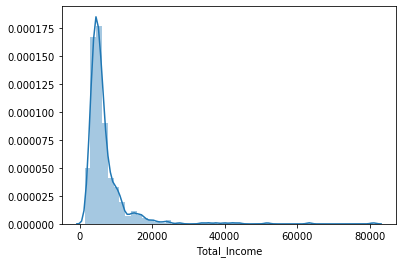

In [46]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])

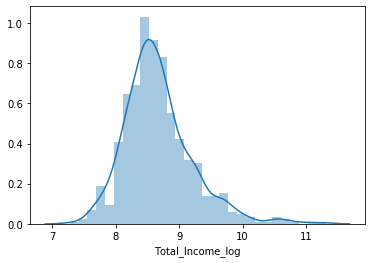

In [47]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])

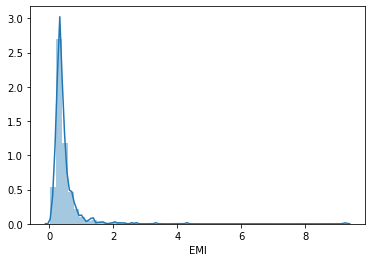

In [48]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test["EMI"]=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

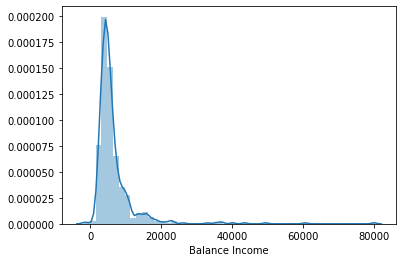

In [49]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
sns.distplot(train['Balance Income'])

In [50]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

In [51]:
test=test.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

In [52]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y.loc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    
#pred_test=model.predict(test)



1 of KFold 5
accuracy score 0.7886178861788617

2 of KFold 5
accuracy score 0.6910569105691057

3 of KFold 5
accuracy score 0.6666666666666666

4 of KFold 5
accuracy score 0.7804878048780488

5 of KFold 5
accuracy score 0.680327868852459
